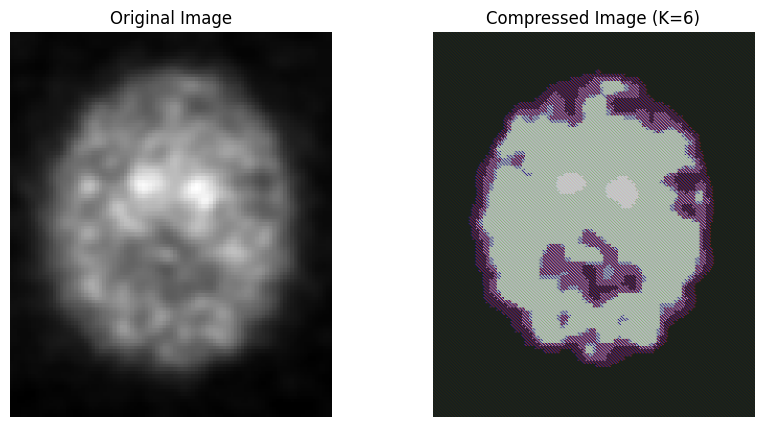

In [44]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

# Example usage
image_path = r"B:\Sami Sir Research\Data set\pngimage\pd\3021_2013-06-13_11_43_03.0_slice38.png"
num_clusters = 6 # You can adjust the number of clusters
compressed_img = kmeans_image(image_path, num_clusters)

# Display original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(image_path))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image (K={num_clusters})')
axs[1].axis('off')

plt.show()


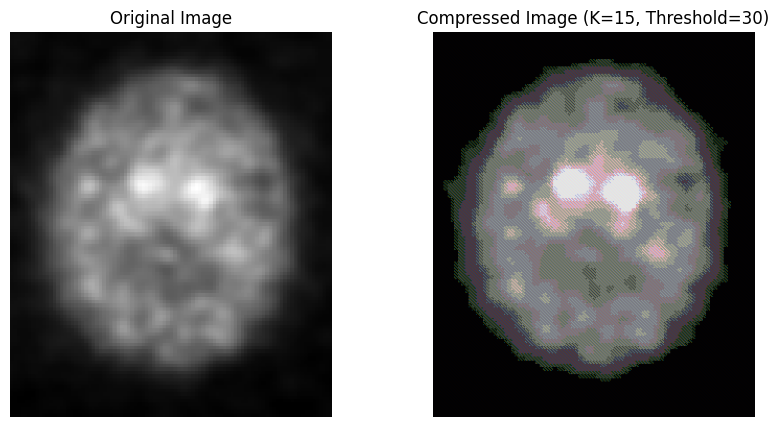

In [52]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters, threshold=None):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Apply threshold if provided
    if threshold is not None:
        img_array[img_array < threshold] = 0  # Set pixel values below threshold to 0
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

# Example usage with threshold
image_path = r"B:\Sami Sir Research\Data set\pngimage\pd\3021_2013-06-13_11_43_03.0_slice38.png"
num_clusters = 15  # You can adjust the number of clusters
threshold = 30  # Adjust the threshold value as needed
compressed_img = kmeans_image(image_path, num_clusters, threshold)

# Display original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(image_path))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image (K={num_clusters}, Threshold={threshold})')
axs[1].axis('off')

plt.show()


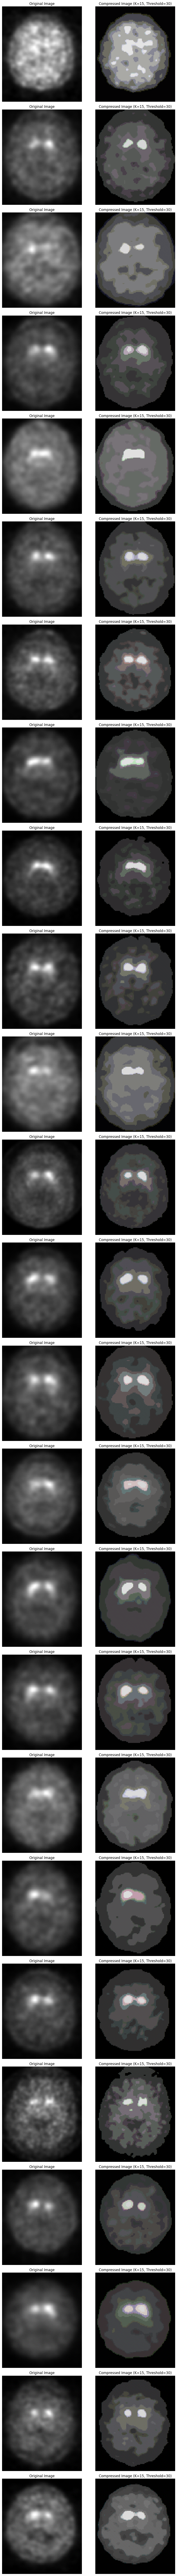

In [57]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters, threshold=None):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Apply threshold if provided
    if threshold is not None:
        img_array[img_array < threshold] = 0  # Set pixel values below threshold to 0
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

def process_images(folder_path, num_clusters, num_images, threshold=None):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    
    # Randomly select specified number of images
    selected_files = np.random.choice(image_files, num_images, replace=False)
    
    # Process each selected image and plot side by side
    num_images = len(selected_files)
    fig, axs = plt.subplots(num_images, 2, figsize=(10, 5*num_images))
    
    for i, filename in enumerate(selected_files):
        image_path = os.path.join(folder_path, filename)
        original_img = Image.open(image_path)
        compressed_img = kmeans_image(image_path, num_clusters, threshold)
        
        axs[i, 0].imshow(original_img)
        axs[i, 0].set_title('Original Image')
        axs[i, 0].axis('off')
        
        axs[i, 1].imshow(compressed_img)
        axs[i, 1].set_title(f'Compressed Image (K={num_clusters}, Threshold={threshold})')
        axs[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = r"B:\Sami Sir Research\Data set\pngimage\pd"
num_clusters = 15  # You can adjust the number of clusters
num_images = 25  # Number of images to select
threshold = 30  # Adjust the threshold value as needed
process_images(folder_path, num_clusters, num_images, threshold)

